In [93]:
# Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [94]:
Train_df = pd.read_csv("Titanic_train.csv")
Train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
Train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
Train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


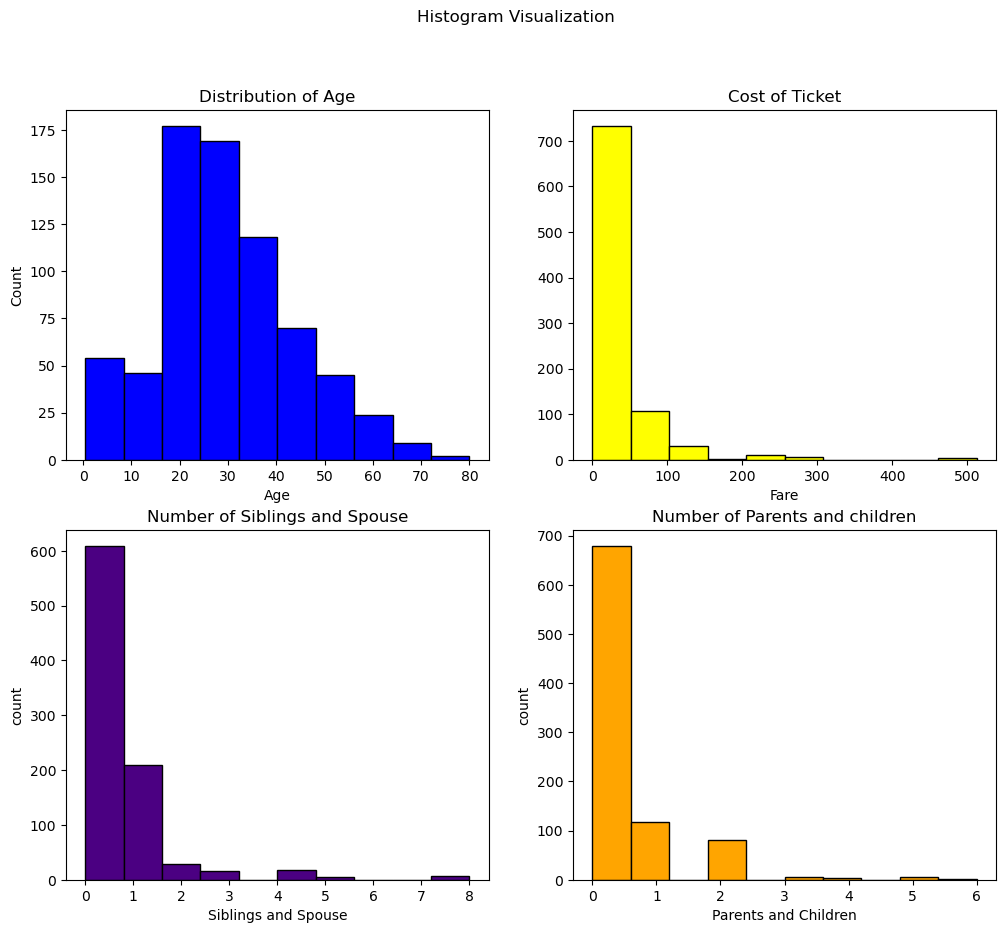

In [98]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
plt.suptitle('Histogram Visualization')

axes[0,0].hist(data=Train_df,x = 'Age',color='blue',edgecolor='black')
axes[0,0].set_title("Distribution of Age")
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Count')

axes[0,1].hist(Train_df['Fare'],bins = 10,color='yellow',edgecolor='black')
axes[0,1].set_title('Cost of Ticket')
axes[0,1].set_xlabel("Fare")

axes[1,0].hist(Train_df['SibSp'],color='indigo',edgecolor='black')
axes[1,0].set_title('Number of Siblings and Spouse')
axes[1,0].set_xlabel('Siblings and Spouse')
axes[1,0].set_ylabel('count')

axes[1,1].hist(Train_df['Parch'],color='orange',edgecolor='black')
axes[1,1].set_title('Number of Parents and children')
axes[1,1].set_xlabel('Parents and Children')
axes[1,1].set_ylabel('count')

plt.show()

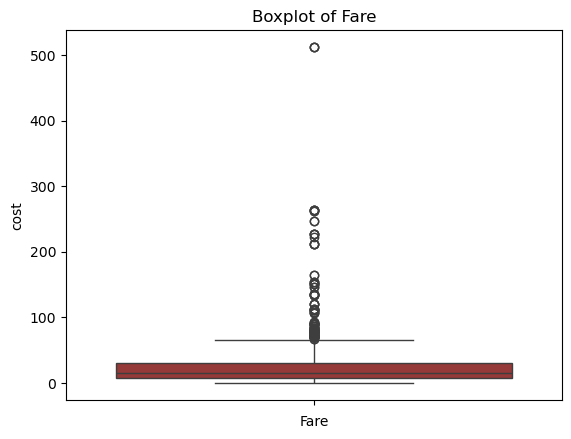

In [99]:
sns.boxplot(Train_df['Fare'],color='brown')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.ylabel('cost')
plt.show()

In [100]:
Train_df[['Survived','Age','Fare','Pclass','SibSp','Parch']].corr()

,Survived,Age,Fare,Pclass,SibSp,Parch
Survived,1.000000,-0.077221,0.257307,-0.338481,-0.035322,0.081629
Age,-0.077221,1.000000,0.096067,-0.369226,-0.308247,-0.189119
Fare,0.257307,0.096067,1.000000,-0.549500,0.159651,0.216225
Pclass,-0.338481,-0.369226,-0.549500,1.000000,0.083081,0.018443
SibSp,-0.035322,-0.308247,0.159651,0.083081,1.000000,0.414838
Parch,0.081629,-0.189119,0.216225,0.018443,0.414838,1.000000


In [101]:
# Lets start Data Cleaning Process
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
# We know that PassengerId, Name, Ticket columns are completely nominal data. Hence we don't need these columns.
Train_df_eda = Train_df.drop(columns=['PassengerId','Ticket','Name'])

In [103]:
Train_df_eda

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [104]:
Train_df_eda.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [105]:
# Cabin columns is almost Null values. Hence we won't be needing that column.
Train_df_eda.drop(columns='Cabin',inplace=True)

In [106]:
Train_df_eda.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [107]:
Train_df_eda['Embarked']=Train_df_eda['Embarked'].fillna('S')

In [108]:
Train_df_eda['Age']=Train_df_eda['Age'].fillna(Train_df_eda['Age'].mean())

In [109]:
Train_df_eda.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [110]:
Train_df_eda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [111]:
# We are done with treating missing values. Now lets Encode categorical variables.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Sex = encoder.fit_transform(Train_df_eda['Sex'])
Train_df_eda['Sex']=Sex
Embarked = encoder.fit_transform(Train_df_eda['Embarked'])
Train_df_eda['Embarked']=Embarked

In [112]:
Train_df_eda

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [113]:
Train_df_eda[['Embarked_0','Embarked_1','Embarked_2']]=pd.get_dummies(Train_df_eda['Embarked'],dtype='int')
Train_df_eda[['Pclass_1','Pclass_2','Pclass_3']]=pd.get_dummies(Train_df_eda['Pclass'],dtype='int')

In [114]:
Train_df_eda.drop(columns=['Pclass','Embarked'],inplace=True)

In [115]:
Train_df_eda

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.000000,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.000000,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,1,1,0,0
4,0,1,35.000000,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,0,0,1,0,1,0
887,1,0,19.000000,0,0,30.0000,0,0,1,1,0,0
888,0,0,29.699118,1,2,23.4500,0,0,1,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0,1,0,0


In [116]:
x_train = Train_df_eda.iloc[:,1:]
y_train = Train_df_eda.iloc[:,0]

In [117]:
x_train

,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,1,22.000000,1,0,7.2500,0,0,1,0,0,1
1,0,38.000000,1,0,71.2833,1,0,0,1,0,0
2,0,26.000000,0,0,7.9250,0,0,1,0,0,1
3,0,35.000000,1,0,53.1000,0,0,1,1,0,0
4,1,35.000000,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,0,0,1,0,1,0
887,0,19.000000,0,0,30.0000,0,0,1,1,0,0
888,0,29.699118,1,2,23.4500,0,0,1,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0,1,0,0


In [118]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
log = model.fit(x_train,y_train)
y_pred = model.predict(x_train)

In [119]:
Train_df_eda['Y_predicted'] = y_pred
Train_df_eda

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Y_predicted
0,0,1,22.000000,1,0,7.2500,0,0,1,0,0,1,0
1,1,0,38.000000,1,0,71.2833,1,0,0,1,0,0,1
2,1,0,26.000000,0,0,7.9250,0,0,1,0,0,1,1
3,1,0,35.000000,1,0,53.1000,0,0,1,1,0,0,1
4,0,1,35.000000,0,0,8.0500,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,0,0,1,0,1,0,0
887,1,0,19.000000,0,0,30.0000,0,0,1,1,0,0,1
888,0,0,29.699118,1,2,23.4500,0,0,1,0,0,1,0
889,1,1,26.000000,0,0,30.0000,1,0,0,1,0,0,1


In [120]:
from sklearn.metrics import accuracy_score
Train_accuracy = accuracy_score(y_pred,y_train)*100
print(f"Training accuracy = {Train_accuracy} ")

Training accuracy = 80.8080808080808 


In [121]:
Test_df = pd.read_csv("Titanic_test.csv")
Test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [123]:
Test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [124]:
Test_df_eda = Test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
Test_df_eda

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [125]:
Test_df_eda.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [126]:
Test_df_eda['Age']=Test_df_eda['Age'].fillna(Test_df_eda['Age'].mean())
Test_df_eda['Fare']=Test_df_eda['Fare'].fillna(Test_df_eda['Age'].median())
Test_df_eda.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [127]:
Test_df_eda[['Embarked_0','Embarked_1','Embarked_2']]= pd.get_dummies(Test_df_eda['Embarked'],dtype='int')
Test_df_eda[['Pclass_1','Pclass_2','Pclass_3']]=pd.get_dummies(Test_df_eda['Pclass'],dtype='int')
Test_df_eda.drop(columns = ['Pclass','Embarked'],inplace=True)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Sex = encoder.fit_transform(Test_df_eda['Sex'])
Test_df_eda['Sex']=Sex
Test_df_eda

,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,1,34.50000,0,0,7.8292,0,1,0,0,0,1
1,0,47.00000,1,0,7.0000,0,0,1,0,0,1
2,1,62.00000,0,0,9.6875,0,1,0,0,1,0
3,1,27.00000,0,0,8.6625,0,0,1,0,0,1
4,0,22.00000,1,1,12.2875,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1,30.27259,0,0,8.0500,0,0,1,0,0,1
414,0,39.00000,0,0,108.9000,1,0,0,1,0,0
415,1,38.50000,0,0,7.2500,0,0,1,0,0,1
416,1,30.27259,0,0,8.0500,0,0,1,0,0,1


In [128]:
x_test = Test_df_eda

In [129]:
y_predicted = model.predict(x_test)

In [130]:
Test_df_eda['Survived(Predicted)']=y_predicted

In [131]:
Test_df_eda

,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Survived(Predicted)
0,1,34.50000,0,0,7.8292,0,1,0,0,0,1,0
1,0,47.00000,1,0,7.0000,0,0,1,0,0,1,0
2,1,62.00000,0,0,9.6875,0,1,0,0,1,0,0
3,1,27.00000,0,0,8.6625,0,0,1,0,0,1,0
4,0,22.00000,1,1,12.2875,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,30.27259,0,0,8.0500,0,0,1,0,0,1,0
414,0,39.00000,0,0,108.9000,1,0,0,1,0,0,1
415,1,38.50000,0,0,7.2500,0,0,1,0,0,1,0
416,1,30.27259,0,0,8.0500,0,0,1,0,0,1,0


In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
accuracy = accuracy_score(y_pred,y_train)
precision = precision_score(y_pred,y_train)
recall = recall_score(y_pred,y_train)
f1 = f1_score(y_pred,y_train,)
roc_auc = roc_auc_score(y_pred,y_train)
print("accuracy :",accuracy)
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print(f'roc_auc_score: {roc_auc}')

accuracy : 0.8080808080808081
precision: 0.7017543859649122
recall: 0.7766990291262136
f1: 0.7373271889400922
roc_auc_score: 0.8007206485837254


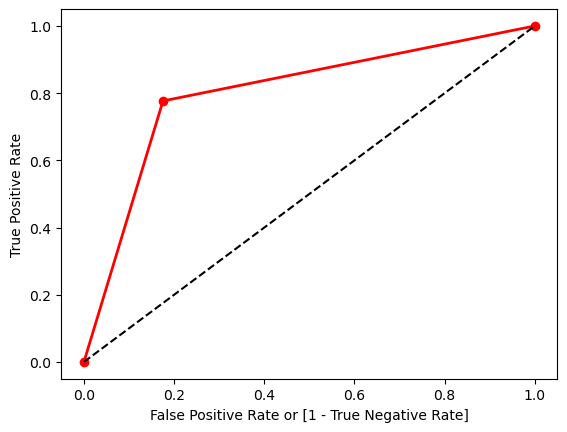

In [133]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_pred,y_train)
plt.plot(fpr,tpr,color='red',linewidth = 2,marker='o')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [134]:
auc = roc_auc_score(y_pred,y_train)
print(f"Area under the curve: {auc}")

Area under the curve: 0.8007206485837254


In [135]:
Train_df_eda

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Y_predicted
0,0,1,22.000000,1,0,7.2500,0,0,1,0,0,1,0
1,1,0,38.000000,1,0,71.2833,1,0,0,1,0,0,1
2,1,0,26.000000,0,0,7.9250,0,0,1,0,0,1,1
3,1,0,35.000000,1,0,53.1000,0,0,1,1,0,0,1
4,0,1,35.000000,0,0,8.0500,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,0,0,1,0,1,0,0
887,1,0,19.000000,0,0,30.0000,0,0,1,1,0,0,1
888,0,0,29.699118,1,2,23.4500,0,0,1,0,0,1,0
889,1,1,26.000000,0,0,30.0000,1,0,0,1,0,0,1


In [136]:
from sklearn.linear_model import LogisticRegression
X = Train_df_eda.iloc[:,1:]
Y = Train_df_eda.iloc[:,0]
model = LogisticRegression()
model.fit(X,Y)
Y_pred = model.predict(X)

print(model.coef_)
print(Train_df_eda.columns)


[[-1.89450979 -0.02931064 -0.26729945  0.01459428  0.00193011  0.3254253
   0.51113723  0.09866951  1.18720856  0.39208826 -0.64406478  0.71171649]]
Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Y_predicted'],
      dtype='object')
